datastuff:
0 - timestamp
1 - ?
2 - open
3 - high
4 - low
5 - close
6 - volume

In [1]:
import csv
import os
import numpy as np

data_list = []
file2id = {}
id2file = []

for data_file in os.listdir('data/'):
    if data_file == '.DS_Store':
        continue
    with open('data/' + data_file, 'rb') as f:
        reader = csv.reader(f, delimiter=',')
        tmp = list(reader)
        floats = [[float(elem) for elem in row] for row in tmp]
        data_content = np.array(floats)
        #print data_content.shape
        
        data_list.append(data_content.T)
        file2id[data_file] = len(data_list) - 1
        id2file.append(data_file)

In [2]:
print len(data_list)
print len(data_list[0])

500
7


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


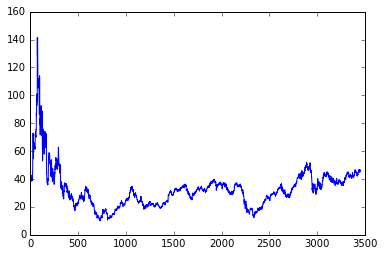

In [3]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

plt.plot(data_list[0][5])
plt.show()

In [22]:
# prepare data
X = []
timehorizon = 20
for dataset in data_list:
    if len(dataset[0]) == 3926:
        X.append(dataset[2:6])

x_np = np.array(X)
print x_np.shape
time_series = x_np.reshape(-1, 3926, 4).swapaxes(0,1).reshape(3926,-1)

input_data = np.zeros((x_np.shape[2] - timehorizon + 1,
                       x_np.shape[0] * x_np.shape[1] * (timehorizon - 1) + x_np.shape[0]))


for i in range(x_np.shape[2] - timehorizon + 1):
    for j in range(timehorizon-1):
        input_data[i,x_np.shape[0] * x_np.shape[1]*j:(j+1)*x_np.shape[0] * x_np.shape[1]] = x_np[:,:,i+j:i+j+1].reshape(-1)
    
    input_data[i,x_np.shape[0] * x_np.shape[1]*(timehorizon-1):] = x_np[:,0,i+timehorizon-1:i+timehorizon].reshape(-1)

targets = np.zeros((3926, 2))
for i in range(3926):
    if x_np[0][0][i] > x_np[0][-1][i]:
        targets[i, 0] = 1
    else:
        targets[i, 1] = 1
        
targets_bin = np.zeros((3926))
for i in range(3926):
    if x_np[0][0][i] > x_np[0][-1][i]:
        targets_bin[i] = 1
        
targets_time = targets[timehorizon-1:]
targets_time_bin = targets_bin[timehorizon-1:]
        
print input_data.shape
print targets_time.shape

(388, 4, 3926)
(3907, 29876)
(3907, 2)


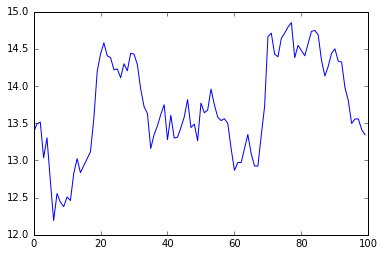

(388, 4, 3926)
(3926,)
(3926,)
[ 13.3754  13.4916  13.5159  13.0344  13.3042]
(3926,)


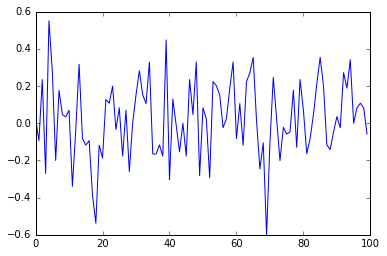

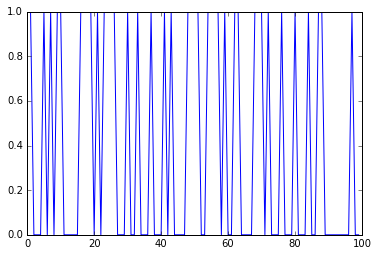

In [23]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

plt.plot(x_np[0][0][:100])
plt.show()


print x_np.shape
print x_np[0,0].shape
print x_np[0,3].shape
a = np.array(list(x_np[0,0]))
print a[:5]
ab = a-np.array(list(x_np[0,3]))
print ab.shape
plt.plot((ab[:100]))
plt.show()

plt.plot(targets_time[:100,1])
plt.show()

In [25]:
# from http://keras.io/examples/#multilayer-perceptron-mlp-for-multi-class-softmax-classification
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(output_dim=300, input_dim=29876, init="he_normal"))
model.add(Activation("tanh"))
model.add(Dense(output_dim=300, input_dim=300, init="he_normal"))
model.add(Activation("tanh"))
model.add(Dense(output_dim=300, input_dim=300, init="he_normal"))
model.add(Activation("tanh"))
model.add(Dense(output_dim=2, init="he_normal"))
model.add(Activation("softmax"))

#sgd = SGD(lr=0.1, decay=1e-2, momentum=0.5, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

model.fit(input_data, targets_time, show_accuracy=True, nb_epoch=50)

Epoch 1/50
3907/3907 [==============================] - 5s - loss: 1.0045 - acc: 0.5076     
Epoch 2/50
3907/3907 [==============================] - 5s - loss: 0.7291 - acc: 0.4968     
Epoch 3/50
3907/3907 [==============================] - 5s - loss: 0.7048 - acc: 0.5203     
Epoch 4/50
3907/3907 [==============================] - 5s - loss: 0.7078 - acc: 0.4996     
Epoch 5/50
3907/3907 [==============================] - 5s - loss: 0.7036 - acc: 0.5024     
Epoch 6/50
3907/3907 [==============================] - 5s - loss: 0.7012 - acc: 0.5114     
Epoch 7/50
3907/3907 [==============================] - 5s - loss: 0.7076 - acc: 0.4960     
Epoch 8/50
3907/3907 [==============================] - 5s - loss: 0.7003 - acc: 0.5155     
Epoch 9/50
3907/3907 [==============================] - 5s - loss: 0.7061 - acc: 0.4986     
Epoch 10/50
3907/3907 [==============================] - 5s - loss: 0.7048 - acc: 0.5093     
Epoch 11/50
3907/3907 [==============================] - 5s - loss: 0

In [18]:
# from http://keras.io/examples/#multilayer-perceptron-mlp-for-multi-class-softmax-classification
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(output_dim=300, input_dim=5044, init="he_normal"))
model.add(Activation("tanh"))
model.add(Dense(output_dim=300, input_dim=300, init="he_normal"))
model.add(Activation("tanh"))
model.add(Dense(output_dim=300, input_dim=300, init="he_normal"))
model.add(Activation("tanh"))
model.add(Dense(output_dim=1, init="he_normal"))
model.add(Activation("sigmoid"))

sgd = SGD(lr=0.1, decay=1e-2, momentum=0.5, nesterov=True)
model.compile(loss='poisson', optimizer=sgd)

model.fit(input_data, targets_time_bin, show_accuracy=True, nb_epoch=10)

Epoch 1/10
3923/3923 [==============================] - 0s - loss: 1.0019 - acc: 1.0000     
Epoch 2/10
3923/3923 [==============================] - 0s - loss: 1.0000 - acc: 1.0000     
Epoch 3/10
3923/3923 [==============================] - 0s - loss: 1.0000 - acc: 1.0000     
Epoch 4/10
3923/3923 [==============================] - 1s - loss: 1.0000 - acc: 1.0000     
Epoch 5/10
3923/3923 [==============================] - 1s - loss: 1.0000 - acc: 1.0000     
Epoch 6/10
3923/3923 [==============================] - 0s - loss: 1.0000 - acc: 1.0000     
Epoch 7/10
3923/3923 [==============================] - 0s - loss: 1.0000 - acc: 1.0000     
Epoch 8/10
3923/3923 [==============================] - 0s - loss: 1.0000 - acc: 1.0000     
Epoch 9/10
3923/3923 [==============================] - 0s - loss: 1.0000 - acc: 1.0000     
Epoch 10/10
3923/3923 [==============================] - 0s - loss: 1.0000 - acc: 1.0000     


In [19]:
print np.sum(targets_time_bin>0)

2067


In [20]:
a = model.predict(input_data)

In [21]:
n = 5
zip(a[:n], targets_time_bin[:n])

[(array([ 0.99999607]), 0.0),
 (array([ 0.99999613]), 1.0),
 (array([ 0.99999619]), 1.0),
 (array([ 0.99999619]), 0.0),
 (array([ 0.99999583]), 1.0)]